In [1]:
import os
import sys
import numpy as np
import xarray as xr

import cartopy.feature as cfeature
import cartopy.crs as ccrs

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

import warnings
warnings.filterwarnings('ignore')

## Plot each Year for all Products

In [2]:
## 3H
# product, filename, time_reso = 'GSMaP', 'GSMaP_Italy_3h_2002_01_01_2024_12_31.nc', '3h'
# product, filename, time_reso = 'IMERG', 'IMERG_Italy_3h_2001_01_01_2023_12_31.nc', '3h'
# product, filename, time_reso = 'MSWEP', 'MSWEP_Italy_3h_1980_01_01_2023_12_31.nc', '3h'
# product, filename, time_reso = 'CMORPH', 'CMORPH_Italy_3hr_1998_01_01_2023_12_31.nc', '3h'
# product, filename, time_reso = 'ERA5', 'ERA5_Italy_3h_2000_01_01_2023_12_31.nc', '3h'

## 1 dy
# product, filename, time_reso = 'GSMaP', 'GSMaP_Italy_1dy_2002_01_01_2024_12_31.nc', '1dy'
# product, filename, time_reso = 'IMERG', 'IMERG_Italy_1dy_2000_06_01_2024_02_29.nc', '1dy'
# product, filename, time_reso = 'MSWEP', 'MSWEP_Italy_1dy_1980_01_01_2023_12_31.nc', '1dy'
# product, filename, time_reso = 'CMORPH', 'CMORPH_Italy_1dy_1998_01_01_2024_01_31.nc', '1dy'
# product, filename, time_reso = 'ERA5', 'ERA5_Italy_1dy_2000_01_01_2023_12_31.nc', '1dy'
product, filename, time_reso = 'CHIRPS', 'CHIRPS_Italy_1dy_1981_01_01_2024_06_30.nc', '1dy'

In [3]:
yys, yye = 2002, 2023

lon_min, lon_max, lat_min, lat_max, area = 8, 13.5, 44.5, 47, 'VENETO'

In [4]:
dir_base = os.path.join('/','media','arturo','T9','Data','Italy','Satellite')

In [5]:
filename = os.path.join(dir_base,product,time_reso,filename)
DATA = xr.open_dataset(filename)
DATA = DATA.sel(time=slice(f'{yys}-01-01', f'{yye}-12-31'))
# DATA = DATA.sel(lat=slice(lat_max+1, lat_min-1), lon=slice(lon_min-1, lon_max+1))

GSlat = DATA.lat.values
GSlon = DATA.lon.values
GSlon2d, GSlat2d = np.meshgrid(GSlon, GSlat)

DATA

<xarray.Dataset> Size: 2GB
Dimensions:  (time: 8035, lat: 240, lon: 260)
Coordinates:
  * time     (time) datetime64[ns] 64kB 2002-01-01 2002-01-02 ... 2023-12-31
  * lat      (lat) float32 960B 36.02 36.07 36.12 36.17 ... 47.87 47.92 47.97
  * lon      (lon) float32 1kB 6.025 6.075 6.125 6.175 ... 18.88 18.93 18.97
Data variables:
    PRE      (time, lat, lon) float32 2GB ...
Attributes:
    description:  CHIRPS daily data for Italy region

In [6]:
DATA_2002 = DATA.sel(time=slice('2002-01-01', '2002-12-31'))
DATA_2003 = DATA.sel(time=slice('2003-01-01', '2003-12-31'))
DATA_2004 = DATA.sel(time=slice('2004-01-01', '2004-12-31'))
DATA_2005 = DATA.sel(time=slice('2005-01-01', '2005-12-31'))
DATA_2006 = DATA.sel(time=slice('2006-01-01', '2006-12-31'))
DATA_2007 = DATA.sel(time=slice('2007-01-01', '2007-12-31'))
DATA_2008 = DATA.sel(time=slice('2008-01-01', '2008-12-31'))
DATA_2009 = DATA.sel(time=slice('2009-01-01', '2009-12-31'))
DATA_2010 = DATA.sel(time=slice('2010-01-01', '2010-12-31'))
DATA_2011 = DATA.sel(time=slice('2011-01-01', '2011-12-31'))
DATA_2012 = DATA.sel(time=slice('2012-01-01', '2012-12-31'))
DATA_2013 = DATA.sel(time=slice('2013-01-01', '2013-12-31'))
DATA_2014 = DATA.sel(time=slice('2014-01-01', '2014-12-31'))
DATA_2015 = DATA.sel(time=slice('2015-01-01', '2015-12-31'))
DATA_2016 = DATA.sel(time=slice('2016-01-01', '2016-12-31'))
DATA_2017 = DATA.sel(time=slice('2017-01-01', '2017-12-31'))
DATA_2018 = DATA.sel(time=slice('2018-01-01', '2018-12-31'))
DATA_2019 = DATA.sel(time=slice('2019-01-01', '2019-12-31'))
DATA_2020 = DATA.sel(time=slice('2020-01-01', '2020-12-31'))
DATA_2021 = DATA.sel(time=slice('2021-01-01', '2021-12-31'))
DATA_2022 = DATA.sel(time=slice('2022-01-01', '2022-12-31'))
DATA_2023 = DATA.sel(time=slice('2023-01-01', '2023-12-31'))

Export figure to: ../figures/PRODUCTS/Year_mean_CHIRPS_1dy.png


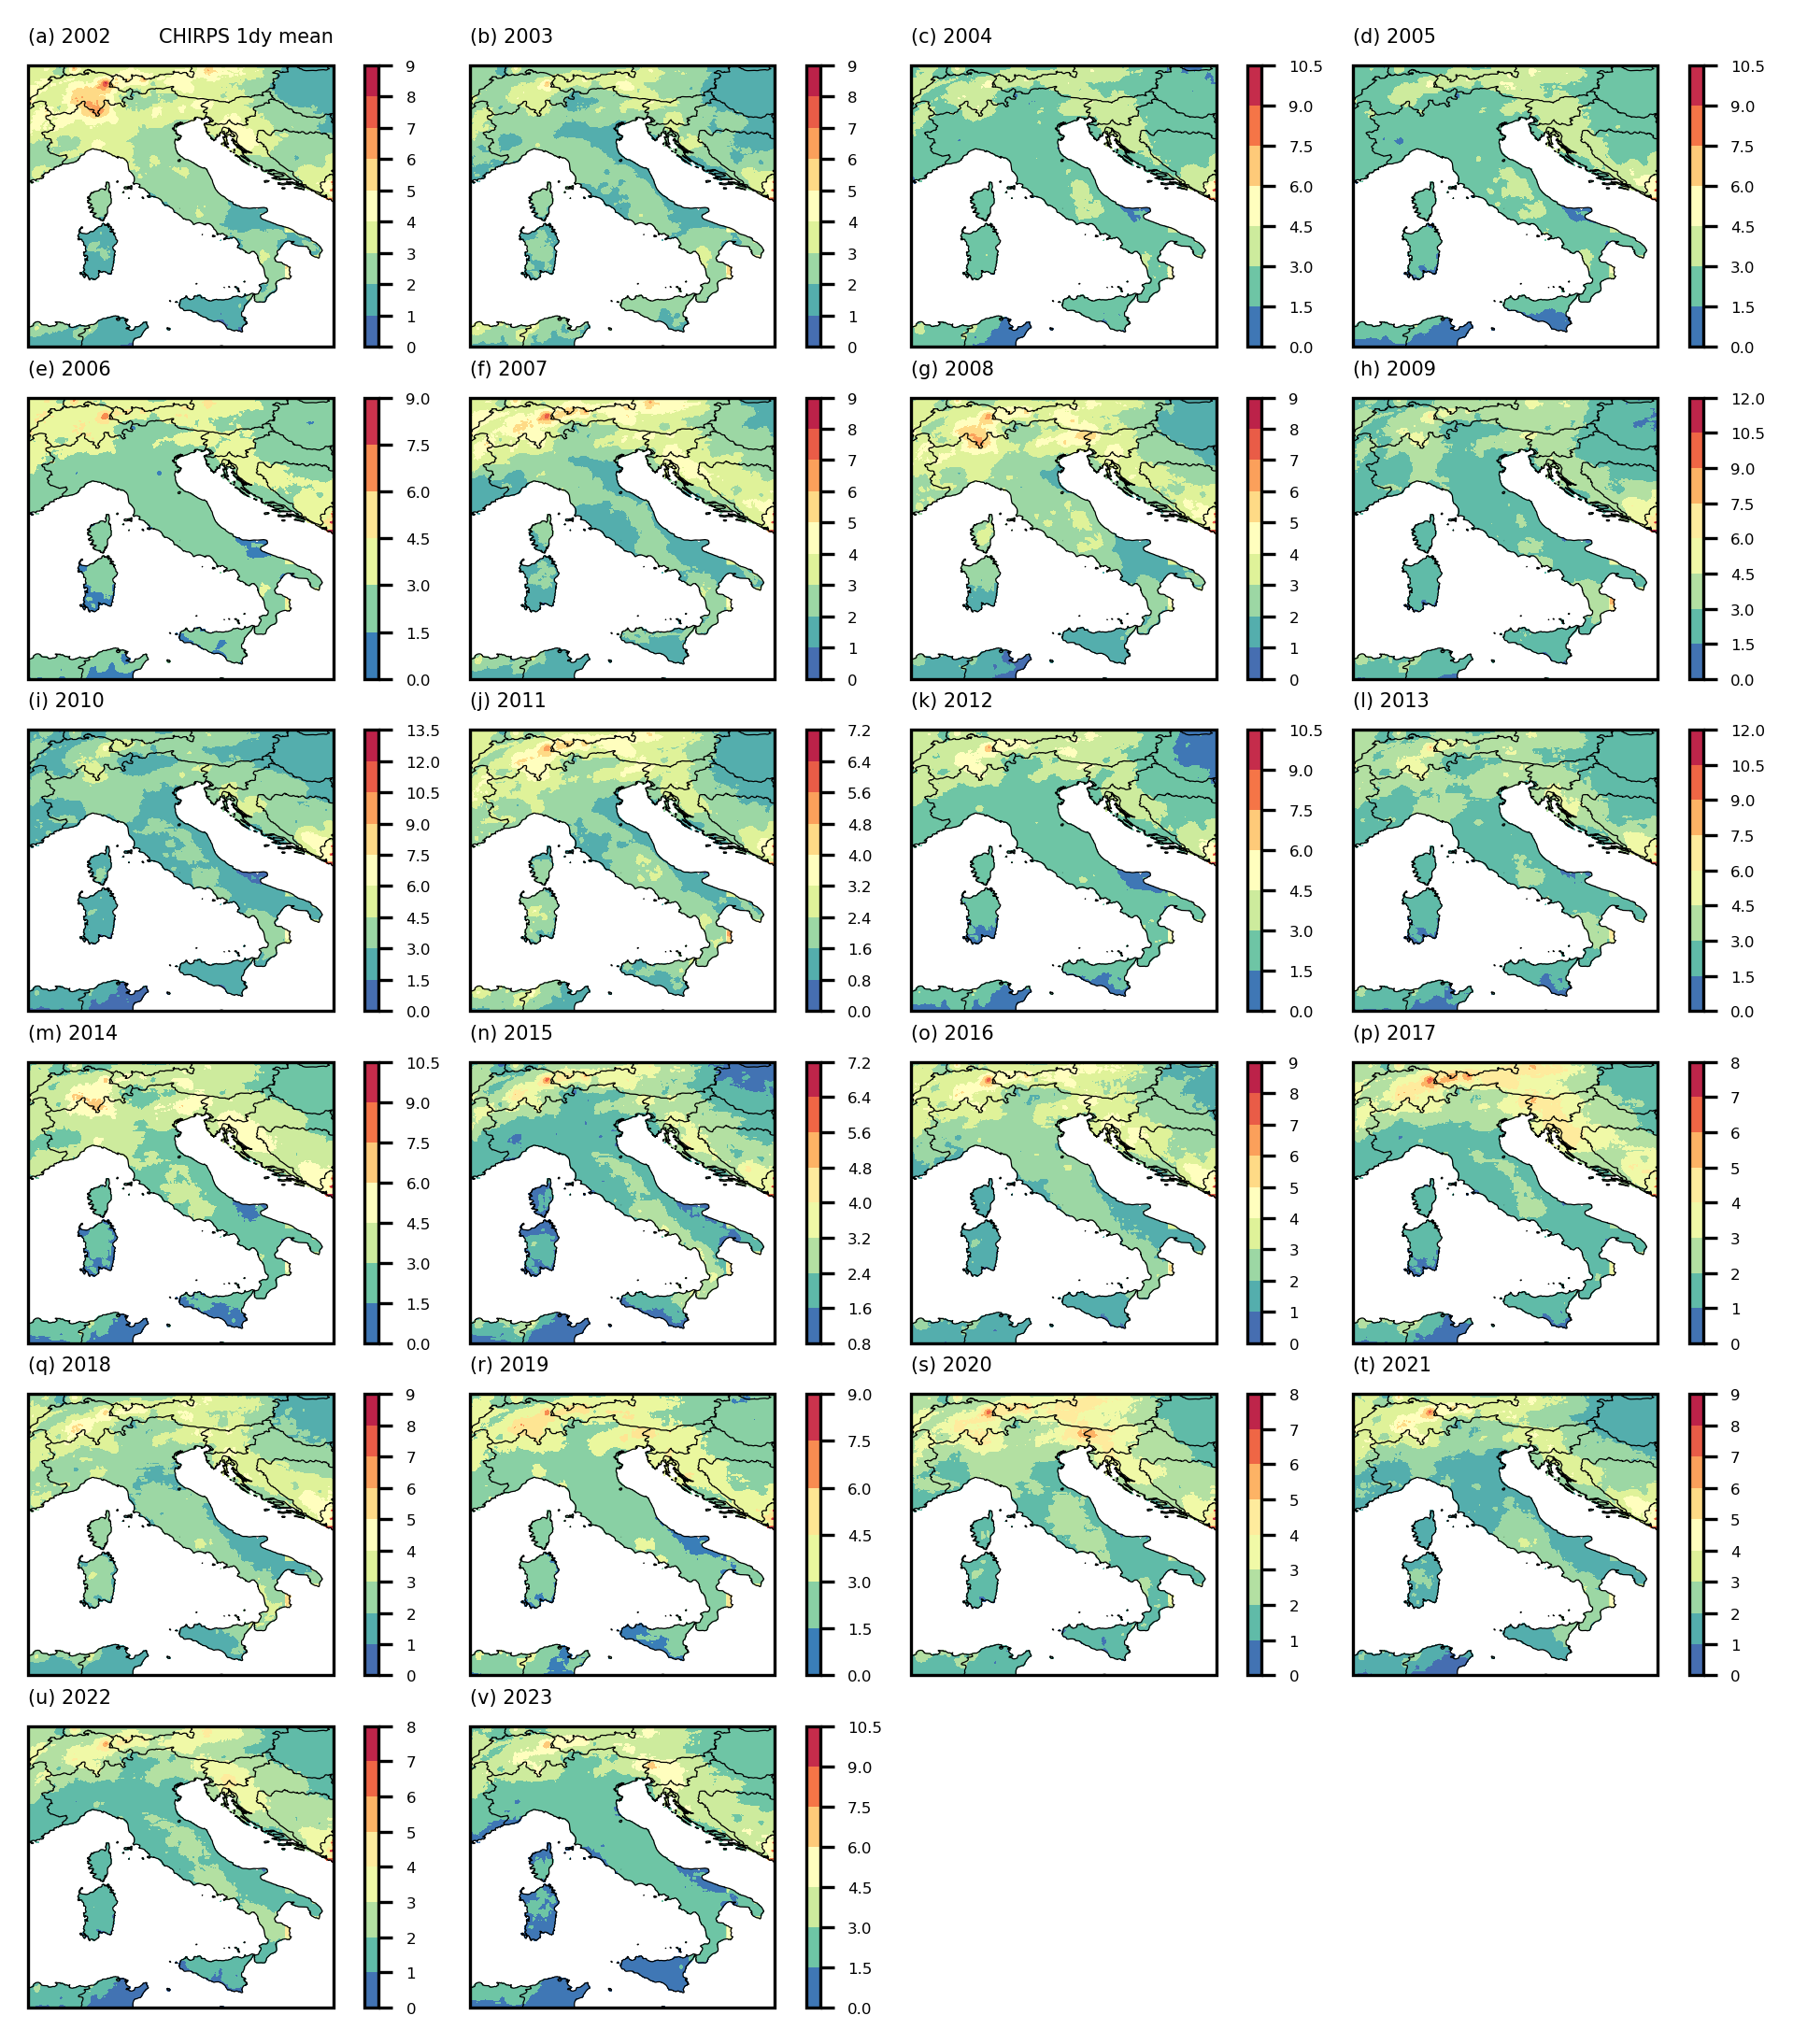

In [7]:
levels = np.arange(0,1.6,0.1)
levels = None

cmap = plt.cm.Spectral_r
proj = ccrs.PlateCarree()

fig = plt.figure(figsize=(9,9),dpi=300)
gs = gridspec.GridSpec(6,4)

# ==============================================================================
ax1 = plt.subplot(gs[0, 0], projection = proj)
ax1.add_feature(cfeature.COASTLINE,linewidth=0.3,color='black',zorder=4)
ax1.add_feature(cfeature.BORDERS,linewidth=0.3,color='black',zorder=4)
a1 = ax1.contourf(GSlon2d, GSlat2d, np.mean(DATA_2002.PRE.values,axis=0),cmap=cmap, levels=levels)
cbar = plt.colorbar(a1, ax=ax1, orientation='vertical', pad=0.05, fraction=0.028)
cbar.ax.tick_params(labelsize=4)
ax1.set_title('(a) 2002', fontsize=5, loc='left')
ax1.set_title(f'{product} {time_reso} mean', fontsize=5, loc='right')

# ==============================================================================
ax1 = plt.subplot(gs[0, 1], projection = proj)
ax1.add_feature(cfeature.COASTLINE,linewidth=0.3,color='black',zorder=4)
ax1.add_feature(cfeature.BORDERS,linewidth=0.3,color='black',zorder=4)
a1 = ax1.contourf(GSlon2d, GSlat2d, np.mean(DATA_2003.PRE.values,axis=0),cmap=cmap, levels=levels)
cbar = plt.colorbar(a1, ax=ax1, orientation='vertical', pad=0.05, fraction=0.028)
cbar.ax.tick_params(labelsize=4)
ax1.set_title('(b) 2003', fontsize=5, loc='left')

# ==============================================================================
ax1 = plt.subplot(gs[0, 2], projection = proj)
ax1.add_feature(cfeature.COASTLINE,linewidth=0.3,color='black',zorder=4)
ax1.add_feature(cfeature.BORDERS,linewidth=0.3,color='black',zorder=4)
a1 = ax1.contourf(GSlon2d, GSlat2d, np.mean(DATA_2004.PRE.values,axis=0),cmap=cmap, levels=levels)
cbar = plt.colorbar(a1, ax=ax1, orientation='vertical', pad=0.05, fraction=0.028)
cbar.ax.tick_params(labelsize=4)
ax1.set_title('(c) 2004', fontsize=5, loc='left')

# ==============================================================================
ax1 = plt.subplot(gs[0, 3], projection = proj)
ax1.add_feature(cfeature.COASTLINE,linewidth=0.3,color='black',zorder=4)
ax1.add_feature(cfeature.BORDERS,linewidth=0.3,color='black',zorder=4)
a1 = ax1.contourf(GSlon2d, GSlat2d, np.mean(DATA_2005.PRE.values,axis=0),cmap=cmap, levels=levels)
cbar = plt.colorbar(a1, ax=ax1, orientation='vertical', pad=0.05, fraction=0.028)
cbar.ax.tick_params(labelsize=4)
ax1.set_title('(d) 2005', fontsize=5, loc='left')

# ==============================================================================
# ==============================================================================
ax1 = plt.subplot(gs[1, 0], projection = proj)
ax1.add_feature(cfeature.COASTLINE,linewidth=0.3,color='black',zorder=4)
ax1.add_feature(cfeature.BORDERS,linewidth=0.3,color='black',zorder=4)
a1 = ax1.contourf(GSlon2d, GSlat2d, np.mean(DATA_2006.PRE.values,axis=0),cmap=cmap, levels=levels)
cbar = plt.colorbar(a1, ax=ax1, orientation='vertical', pad=0.05, fraction=0.028)
cbar.ax.tick_params(labelsize=4)
ax1.set_title('(e) 2006', fontsize=5, loc='left')

# ==============================================================================
ax1 = plt.subplot(gs[1, 1], projection = proj)
ax1.add_feature(cfeature.COASTLINE,linewidth=0.3,color='black',zorder=4)
ax1.add_feature(cfeature.BORDERS,linewidth=0.3,color='black',zorder=4)
a1 = ax1.contourf(GSlon2d, GSlat2d, np.mean(DATA_2007.PRE.values,axis=0),cmap=cmap, levels=levels)
cbar = plt.colorbar(a1, ax=ax1, orientation='vertical', pad=0.05, fraction=0.028)
cbar.ax.tick_params(labelsize=4)
ax1.set_title('(f) 2007', fontsize=5, loc='left')

# ==============================================================================
ax1 = plt.subplot(gs[1, 2], projection = proj)
ax1.add_feature(cfeature.COASTLINE,linewidth=0.3,color='black',zorder=4)
ax1.add_feature(cfeature.BORDERS,linewidth=0.3,color='black',zorder=4)
a1 = ax1.contourf(GSlon2d, GSlat2d, np.mean(DATA_2008.PRE.values,axis=0),cmap=cmap, levels=levels)
cbar = plt.colorbar(a1, ax=ax1, orientation='vertical', pad=0.05, fraction=0.028)
cbar.ax.tick_params(labelsize=4)
ax1.set_title('(g) 2008', fontsize=5, loc='left')

# ==============================================================================
ax1 = plt.subplot(gs[1, 3], projection = proj)
ax1.add_feature(cfeature.COASTLINE,linewidth=0.3,color='black',zorder=4)
ax1.add_feature(cfeature.BORDERS,linewidth=0.3,color='black',zorder=4)
a1 = ax1.contourf(GSlon2d, GSlat2d, np.mean(DATA_2009.PRE.values,axis=0),cmap=cmap, levels=levels)
cbar = plt.colorbar(a1, ax=ax1, orientation='vertical', pad=0.05, fraction=0.028)
cbar.ax.tick_params(labelsize=4)
ax1.set_title('(h) 2009', fontsize=5, loc='left')

# ==============================================================================
# ==============================================================================
ax1 = plt.subplot(gs[2, 0], projection = proj)
ax1.add_feature(cfeature.COASTLINE,linewidth=0.3,color='black',zorder=4)
ax1.add_feature(cfeature.BORDERS,linewidth=0.3,color='black',zorder=4)
a1 = ax1.contourf(GSlon2d, GSlat2d, np.mean(DATA_2010.PRE.values,axis=0),cmap=cmap, levels=levels)
cbar = plt.colorbar(a1, ax=ax1, orientation='vertical', pad=0.05, fraction=0.028)
cbar.ax.tick_params(labelsize=4)
ax1.set_title('(i) 2010', fontsize=5, loc='left')

# ==============================================================================
ax1 = plt.subplot(gs[2, 1], projection = proj)
ax1.add_feature(cfeature.COASTLINE,linewidth=0.3,color='black',zorder=4)
ax1.add_feature(cfeature.BORDERS,linewidth=0.3,color='black',zorder=4)
a1 = ax1.contourf(GSlon2d, GSlat2d, np.mean(DATA_2011.PRE.values,axis=0),cmap=cmap, levels=levels)
cbar = plt.colorbar(a1, ax=ax1, orientation='vertical', pad=0.05, fraction=0.028)
cbar.ax.tick_params(labelsize=4)
ax1.set_title('(j) 2011', fontsize=5, loc='left')

# ==============================================================================
ax1 = plt.subplot(gs[2, 2], projection = proj)
ax1.add_feature(cfeature.COASTLINE,linewidth=0.3,color='black',zorder=4)
ax1.add_feature(cfeature.BORDERS,linewidth=0.3,color='black',zorder=4)
a1 = ax1.contourf(GSlon2d, GSlat2d, np.mean(DATA_2012.PRE.values,axis=0),cmap=cmap, levels=levels)
cbar = plt.colorbar(a1, ax=ax1, orientation='vertical', pad=0.05, fraction=0.028)
cbar.ax.tick_params(labelsize=4)
ax1.set_title('(k) 2012', fontsize=5, loc='left')

# ==============================================================================
ax1 = plt.subplot(gs[2, 3], projection = proj)
ax1.add_feature(cfeature.COASTLINE,linewidth=0.3,color='black',zorder=4)
ax1.add_feature(cfeature.BORDERS,linewidth=0.3,color='black',zorder=4)
a1 = ax1.contourf(GSlon2d, GSlat2d, np.mean(DATA_2013.PRE.values,axis=0),cmap=cmap, levels=levels)
cbar = plt.colorbar(a1, ax=ax1, orientation='vertical', pad=0.05, fraction=0.028)
cbar.ax.tick_params(labelsize=4)
ax1.set_title('(l) 2013', fontsize=5, loc='left')

# ==============================================================================
# ==============================================================================
ax1 = plt.subplot(gs[3, 0], projection = proj)
ax1.add_feature(cfeature.COASTLINE,linewidth=0.3,color='black',zorder=4)
ax1.add_feature(cfeature.BORDERS,linewidth=0.3,color='black',zorder=4)
a1 = ax1.contourf(GSlon2d, GSlat2d, np.mean(DATA_2014.PRE.values,axis=0),cmap=cmap, levels=levels)
cbar = plt.colorbar(a1, ax=ax1, orientation='vertical', pad=0.05, fraction=0.028)
cbar.ax.tick_params(labelsize=4)
ax1.set_title('(m) 2014', fontsize=5, loc='left')

# ==============================================================================
ax1 = plt.subplot(gs[3, 1], projection = proj)
ax1.add_feature(cfeature.COASTLINE,linewidth=0.3,color='black',zorder=4)
ax1.add_feature(cfeature.BORDERS,linewidth=0.3,color='black',zorder=4)
a1 = ax1.contourf(GSlon2d, GSlat2d, np.mean(DATA_2015.PRE.values,axis=0),cmap=cmap, levels=levels)
cbar = plt.colorbar(a1, ax=ax1, orientation='vertical', pad=0.05, fraction=0.028)
cbar.ax.tick_params(labelsize=4)
ax1.set_title('(n) 2015', fontsize=5, loc='left')

# ==============================================================================
ax1 = plt.subplot(gs[3, 2], projection = proj)
ax1.add_feature(cfeature.COASTLINE,linewidth=0.3,color='black',zorder=4)
ax1.add_feature(cfeature.BORDERS,linewidth=0.3,color='black',zorder=4)
a1 = ax1.contourf(GSlon2d, GSlat2d, np.mean(DATA_2016.PRE.values,axis=0),cmap=cmap, levels=levels)
cbar = plt.colorbar(a1, ax=ax1, orientation='vertical', pad=0.05, fraction=0.028)
cbar.ax.tick_params(labelsize=4)
ax1.set_title('(o) 2016', fontsize=5, loc='left')

# ==============================================================================
ax1 = plt.subplot(gs[3, 3], projection = proj)
ax1.add_feature(cfeature.COASTLINE,linewidth=0.3,color='black',zorder=4)
ax1.add_feature(cfeature.BORDERS,linewidth=0.3,color='black',zorder=4)
a1 = ax1.contourf(GSlon2d, GSlat2d, np.mean(DATA_2017.PRE.values,axis=0),cmap=cmap, levels=levels)
cbar = plt.colorbar(a1, ax=ax1, orientation='vertical', pad=0.05, fraction=0.028)
cbar.ax.tick_params(labelsize=4)
ax1.set_title('(p) 2017', fontsize=5, loc='left')

# ==============================================================================
# ==============================================================================
ax1 = plt.subplot(gs[4, 0], projection = proj)
ax1.add_feature(cfeature.COASTLINE,linewidth=0.3,color='black',zorder=4)
ax1.add_feature(cfeature.BORDERS,linewidth=0.3,color='black',zorder=4)
a1 = ax1.contourf(GSlon2d, GSlat2d, np.mean(DATA_2018.PRE.values,axis=0),cmap=cmap, levels=levels)
cbar = plt.colorbar(a1, ax=ax1, orientation='vertical', pad=0.05, fraction=0.028)
cbar.ax.tick_params(labelsize=4)
ax1.set_title('(q) 2018', fontsize=5, loc='left')

# ==============================================================================
ax1 = plt.subplot(gs[4, 1], projection = proj)
ax1.add_feature(cfeature.COASTLINE,linewidth=0.3,color='black',zorder=4)
ax1.add_feature(cfeature.BORDERS,linewidth=0.3,color='black',zorder=4)
a1 = ax1.contourf(GSlon2d, GSlat2d, np.mean(DATA_2019.PRE.values,axis=0),cmap=cmap, levels=levels)
cbar = plt.colorbar(a1, ax=ax1, orientation='vertical', pad=0.05, fraction=0.028)
cbar.ax.tick_params(labelsize=4)
ax1.set_title('(r) 2019', fontsize=5, loc='left')

# ==============================================================================
ax1 = plt.subplot(gs[4, 2], projection = proj)
ax1.add_feature(cfeature.COASTLINE,linewidth=0.3,color='black',zorder=4)
ax1.add_feature(cfeature.BORDERS,linewidth=0.3,color='black',zorder=4)
a1 = ax1.contourf(GSlon2d, GSlat2d, np.mean(DATA_2020.PRE.values,axis=0),cmap=cmap, levels=levels)
cbar = plt.colorbar(a1, ax=ax1, orientation='vertical', pad=0.05, fraction=0.028)
cbar.ax.tick_params(labelsize=4)
ax1.set_title('(s) 2020', fontsize=5, loc='left')

# ==============================================================================
ax1 = plt.subplot(gs[4, 3], projection = proj)
ax1.add_feature(cfeature.COASTLINE,linewidth=0.3,color='black',zorder=4)
ax1.add_feature(cfeature.BORDERS,linewidth=0.3,color='black',zorder=4)
a1 = ax1.contourf(GSlon2d, GSlat2d, np.mean(DATA_2021.PRE.values,axis=0),cmap=cmap, levels=levels)
cbar = plt.colorbar(a1, ax=ax1, orientation='vertical', pad=0.05, fraction=0.028)
cbar.ax.tick_params(labelsize=4)
ax1.set_title('(t) 2021', fontsize=5, loc='left')

# ==============================================================================
# ==============================================================================
ax1 = plt.subplot(gs[5, 0], projection = proj)
ax1.add_feature(cfeature.COASTLINE,linewidth=0.3,color='black',zorder=4)
ax1.add_feature(cfeature.BORDERS,linewidth=0.3,color='black',zorder=4)
a1 = ax1.contourf(GSlon2d, GSlat2d, np.mean(DATA_2022.PRE.values,axis=0),cmap=cmap, levels=levels)
cbar = plt.colorbar(a1, ax=ax1, orientation='vertical', pad=0.05, fraction=0.028)
cbar.ax.tick_params(labelsize=4)
ax1.set_title('(u) 2022', fontsize=5, loc='left')

# ==============================================================================
ax1 = plt.subplot(gs[5, 1], projection = proj)
ax1.add_feature(cfeature.COASTLINE,linewidth=0.3,color='black',zorder=4)
ax1.add_feature(cfeature.BORDERS,linewidth=0.3,color='black',zorder=4)
a1 = ax1.contourf(GSlon2d, GSlat2d, np.mean(DATA_2023.PRE.values,axis=0),cmap=cmap, levels=levels)
cbar = plt.colorbar(a1, ax=ax1, orientation='vertical', pad=0.05, fraction=0.028)
cbar.ax.tick_params(labelsize=4)
ax1.set_title('(v) 2023', fontsize=5, loc='left')

# ==============================================================================
# ==============================================================================
plt.subplots_adjust(wspace=-0.3, hspace=0.18)

salida = os.path.join('..','figures','PRODUCTS',f'Year_mean_{product}_{time_reso}.png')
print(f'Export figure to: {salida}')
plt.savefig(salida,transparent = False,bbox_inches ='tight',pad_inches = 0.1, facecolor=None)